<a href="https://colab.research.google.com/github/FarhatGani/Data_Visualization_with_Python/blob/main/audi_used_car_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Audi Used Car Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
import pandas as pd

df = pd.read_csv("audi.csv")

display(df.head())

print(df["model"].value_counts())
print(len(df["model"].value_counts()))

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,49.6,1.0


 A3     1929
 Q3     1417
 A4     1381
 A1     1347
 A5      882
 Q5      877
 Q2      822
 A6      748
 Q7      397
 TT      336
 A7      122
 A8      118
 Q8       69
 RS6      39
 RS3      33
 RS4      31
 RS5      29
 R8       28
 S3       18
 SQ5      16
 S4       12
 SQ7       8
 S8        4
 S5        3
 A2        1
 RS7       1
Name: model, dtype: int64
26


# Pie chart for different models of Audi Car

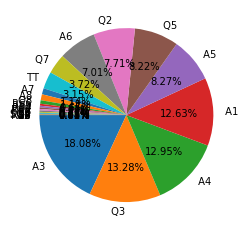

In [ ]:
df["model"].value_counts().plot(kind="pie",
                                autopct='%1.2f%%',
                                startangle=180)
plt.ylabel("")
plt.show()

In [ ]:
df_model = pd.DataFrame(df["model"].value_counts())
df_model = df_model.reset_index()
df_model = df_model.rename(columns={"index":"model","model":"no_of_cars"})

df_model["% of cars"] = (df_model["no_of_cars"]/df.shape[0])*100
df_model = df_model.round(2)

display(df_model)

,model,no_of_cars,% of cars
0,A3,1929,18.08
1,Q3,1417,13.28
2,A4,1381,12.95
3,A1,1347,12.63
4,A5,882,8.27
5,Q5,877,8.22
6,Q2,822,7.71
7,A6,748,7.01
8,Q7,397,3.72
9,TT,336,3.15


# Barplot for different models of Audi Car

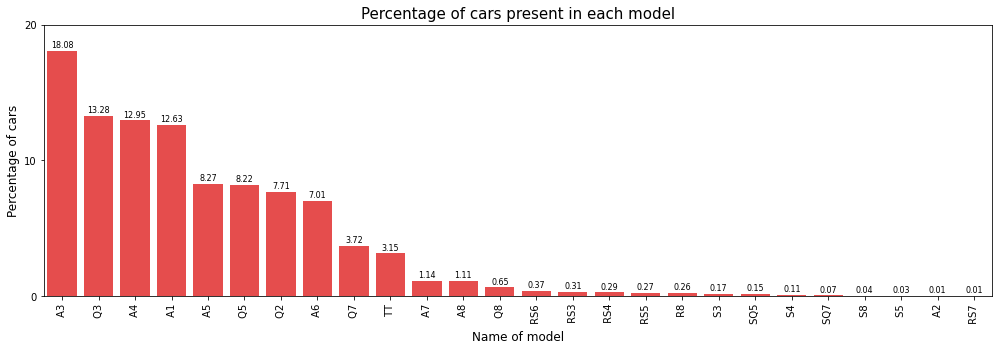

In [ ]:
plt.figure(figsize=(17, 5))

barplot = sns.barplot(x="model", y="% of cars", data=df_model, color="r", alpha=0.8)

for bar in barplot.patches:
    barplot.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0,6),
                   textcoords='offset points')

plt.xlabel("Name of model", size=12)
plt.ylabel("Percentage of cars", size=12)

plt.title("Percentage of cars present in each model", size=15)

plt.xticks(rotation=90)
plt.yticks(np.arange(0,21,10))

plt.show()

### Which plot is better?

If there are too many pieces of data are used, the pie chart becomes less effective. In our dataset, there are 26 different model of Audi car, which make it difficult to differentiate each slice. If we annotate the percentages on each slice, it overlaps each other making it impossible for the reader to read.  We can easily resolve the issues using barplot instead of pie. It's simple and easily understandable.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   mpg           10668 non-null  float64
 7   engineSize    10668 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 666.9+ KB


# Scatter Plot

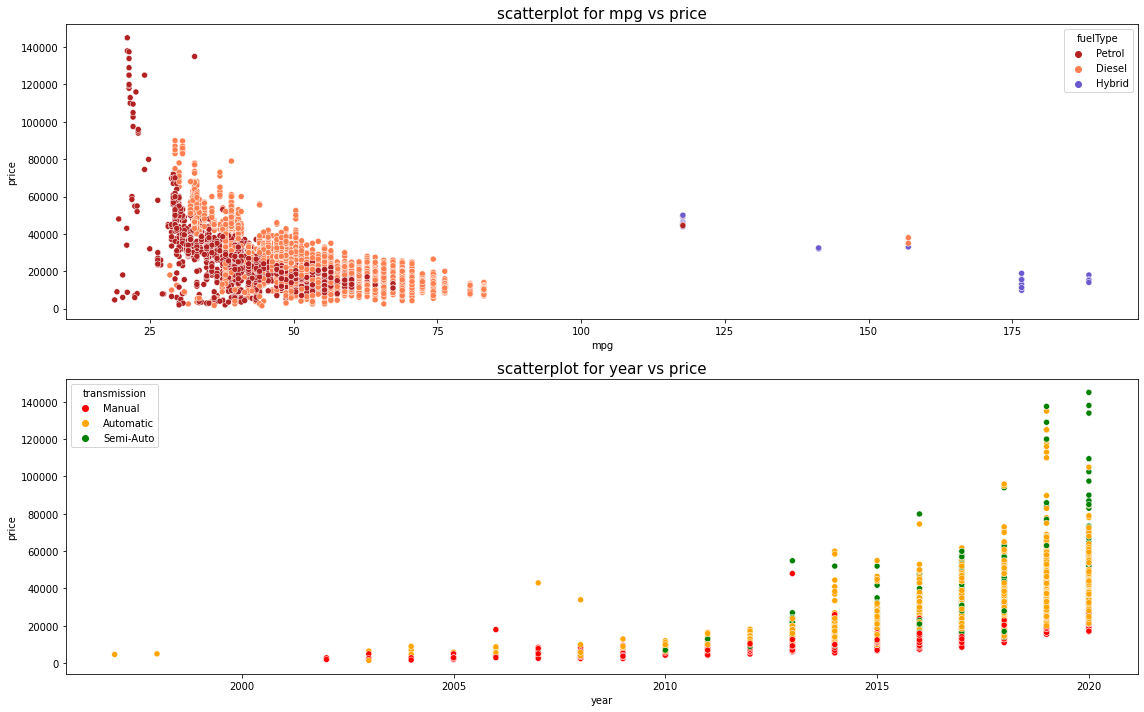

In [ ]:
plt.figure(figsize = (16, 10))

plt.subplot(2,1,1)
plt.title("scatterplot for mpg vs price", size=15)
sns.scatterplot(x ="mpg", y = "price", data = df, hue = "fuelType", palette=['firebrick','coral','slateblue'])


plt.subplot(2,1,2)
plt.title("scatterplot for year vs price", size=15)
sns.scatterplot(x ="year", y = "price", data = df, hue = "transmission", palette=['red','orange','green'])

plt.tight_layout()
plt.show()

### Observations:

Plot 1:

Surprisingly the price and the mpg have a negative correlation which indicate higher priced cars are usually with Lower mpg and vice versa. Cars which use hybrid fuel are with higher mpg and those are relatively of lower price. 


Plot 2:

Most of the latest models seem to be of higher price, so the year and the price values show a positive correlation.
Most of the cheapest cars have manual transmission, the most expensive ones are semi-auto and the mid-range ones have automatic transmission.


# Regression Plot

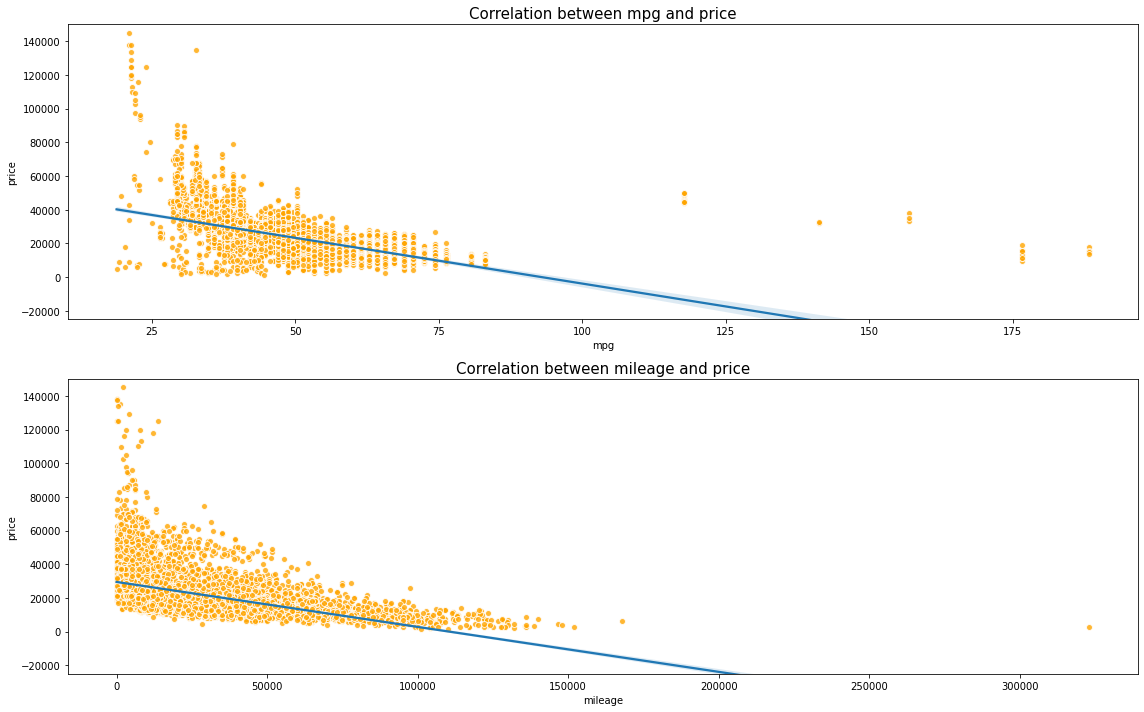

In [ ]:
plt.figure(figsize = (16, 10))

plt.subplot(2, 1, 1)
plt.ylim(-25000, 150000)
plt.title("Correlation between mpg and price", size=15)
sns.regplot(x="mpg", y="price", data=df, scatter_kws={"color":"orange", "edgecolor":"white"})

plt.subplot(2, 1, 2)
plt.ylim(-25000, 150000)
plt.title("Correlation between mileage and price", size=15)
sns.regplot(x="mileage", y="price", data=df, scatter_kws={"color":"orange", "edgecolor":"white"})

plt.tight_layout()
plt.show()

### Observations:

Both mileage-price and mpg-price plots show negative correlation between these variables. 


# Pair Plot

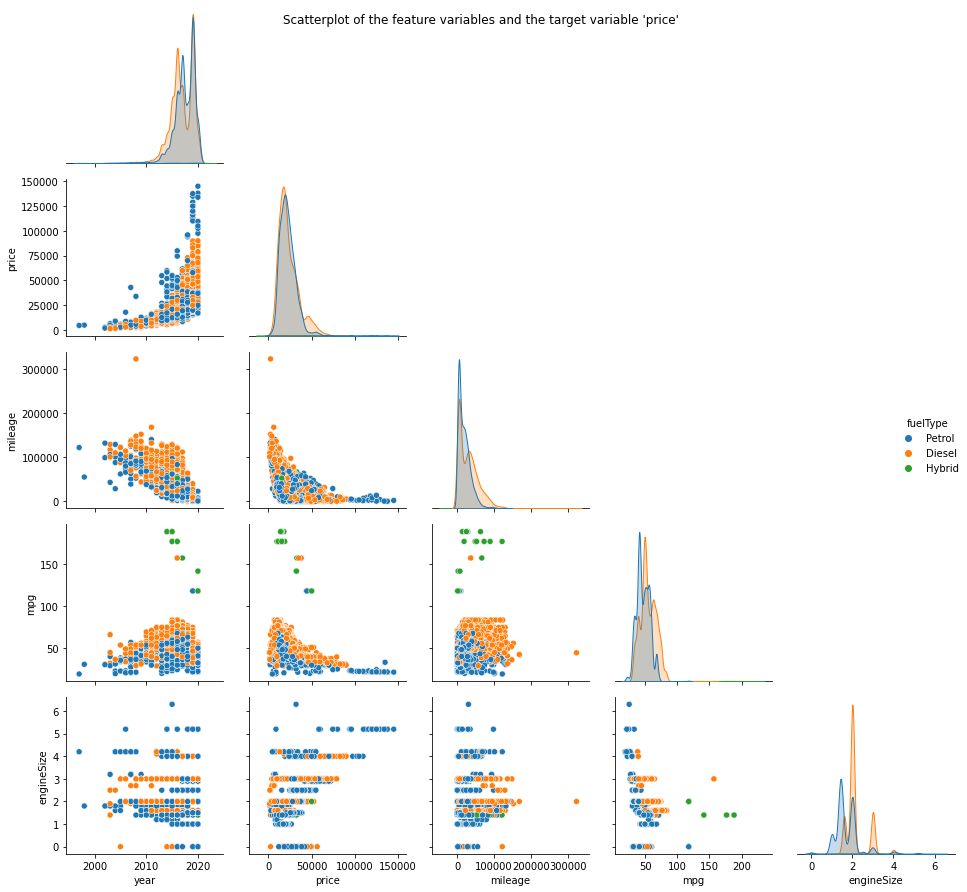

In [ ]:
sns.pairplot(df, corner=True, hue="fuelType")
plt.suptitle("Scatterplot of the feature variables and the target variable 'price'")

plt.tight_layout()
plt.show()

# Histogram

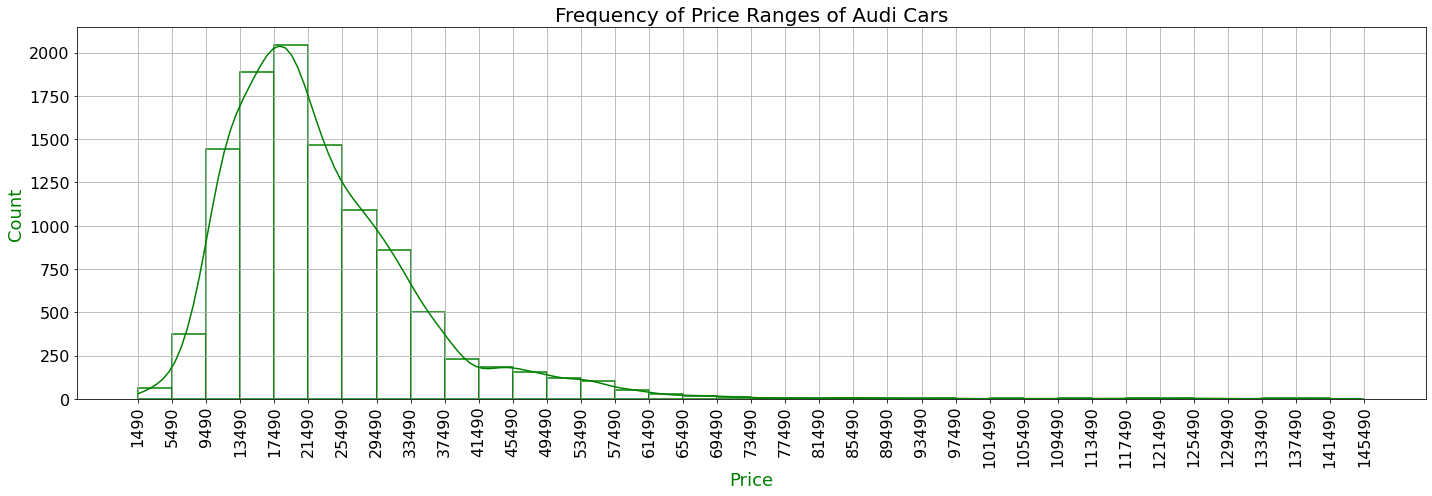

In [ ]:
plt.figure(figsize=(20,7))

sns.histplot(x="price", data=df, binwidth=4000, kde=True, color="green", fill=False)
plt.title("Frequency of Price Ranges of Audi Cars", fontsize=20)
plt.xticks(np.arange(df["price"].min(), df["price"].max()+4001, 4000), rotation=90, fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Price", fontsize=18, color='green')
plt.ylabel("Count", fontsize=18, color='green')

plt.grid()
plt.tight_layout()
plt.show()

## ECDF(Empirical Cumulative Distribution Function)


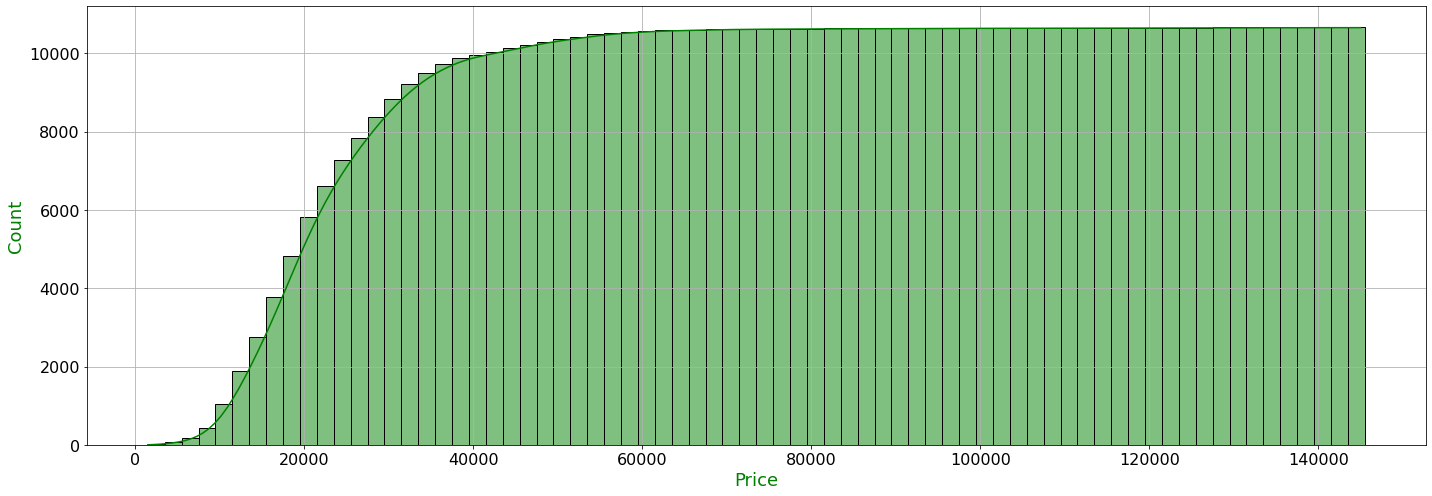

In [ ]:
plt.figure(figsize=(20,7))
sns.histplot(x="price", data=df, binwidth=2000, kde=True, color="green", cumulative=True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Price", fontsize=18, color='green')
plt.ylabel("Count", fontsize=18, color='green')

plt.grid()
plt.tight_layout()
plt.show()



### Observations :
* The price of Audi car strat from 1490 to 145000 USD; but there are very few cars above 60000. 
* Most cars are of 13490-21490 price range, where median value 20200 also lies.

In [ ]:
display(df.describe())

,year,price,mileage,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,188.300000,6.300000


# Boxplot

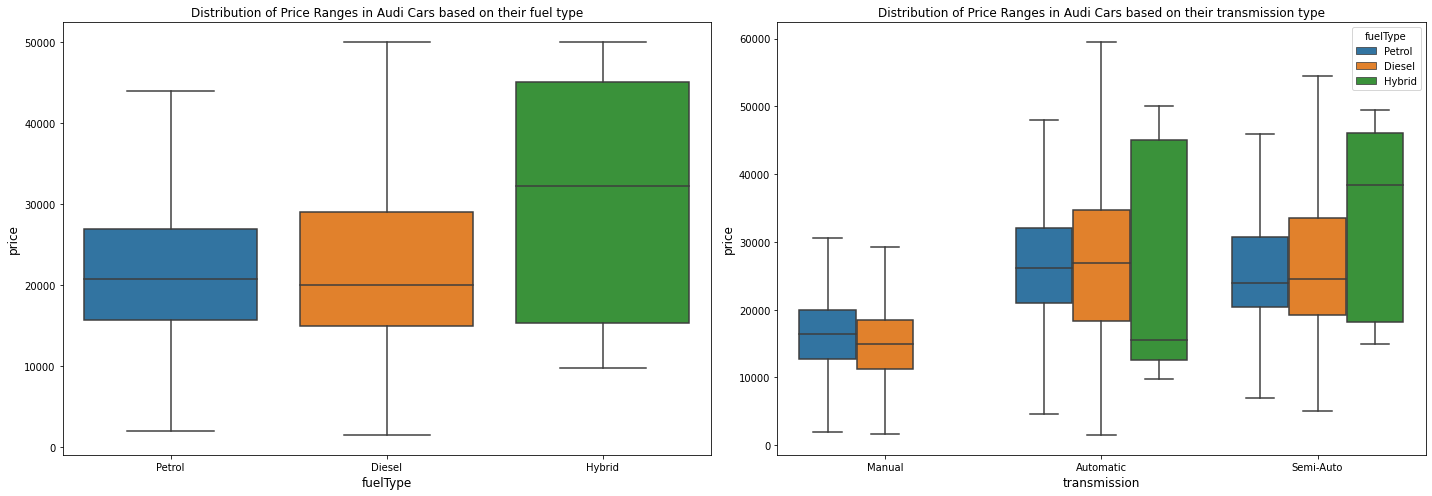

In [ ]:
plt.figure(figsize=(20,7))

plt.subplot(1,2, 1)
plt.xlabel("fuelType", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.title('Distribution of Price Ranges in Audi Cars based on their fuel type')
sns.boxplot(y = "price", data=df, showfliers=False, x="fuelType")

plt.subplot(1, 2, 2)
plt.xlabel("transmission", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.title('Distribution of Price Ranges in Audi Cars based on their transmission type')
sns.boxplot(y = "price", data=df, hue="fuelType", showfliers=False, x="transmission")

plt.tight_layout()
plt.show()

### Observations :
* The prices of automatic cars which use Diesel as fuel vary the most, though 50% cars are in the range of 20-35K.
* Petrol using cars are most affordable where cars use hybrid fuel type are usually with higher prices.
* There are no manual car uses hybrid fuel type and all manual cars price around or below 30000.

# Violin Plot

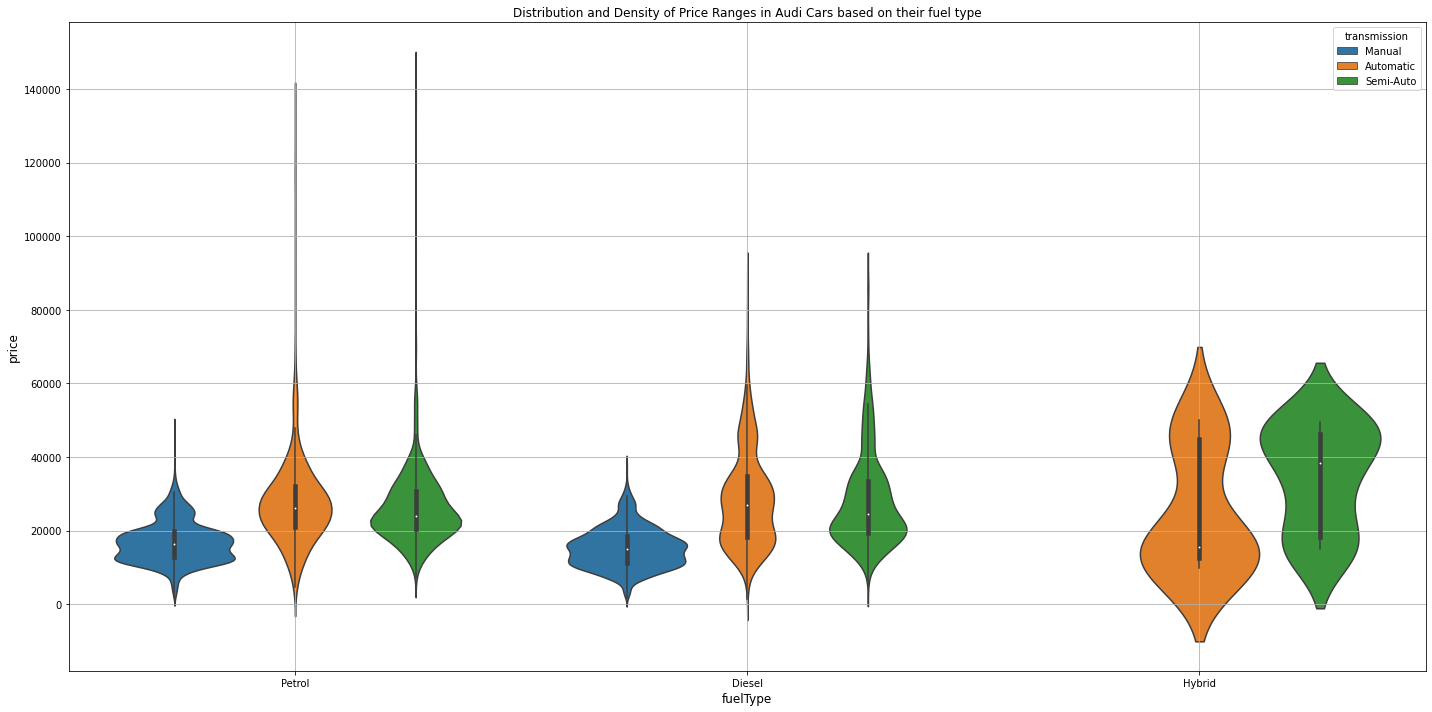

In [ ]:
plt.figure(figsize=(20, 10))

plt.xlabel("fuel type", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.title('Distribution and Density of Price Ranges in Audi Cars based on their fuel type')
sns.violinplot(y = "price", x="fuelType", data=df, hue=df["transmission"], showfliers=False)

plt.tight_layout()
plt.grid()
plt.show()

### Observations :
* The prices of manual cars are almost same whether it uses petrol or diesel.
* More than 50% Hybrid-Automatic cars prices are less than 20K.

## Comparison :

Each kind of plot has different uses. Histogram is useful when there are wide variances exist in a particular dataset. But it is not possible to find mean or median value of a dataset from histogram, that's where box plot comes to help. Box plot shows summary statistics such as mean/median and interquartile ranges of a dataset. Violin plots are very similar to boxplot. In addition to what a boxplot shows, violin plot also shows density of the variable, thus make the plot more informative, convenient and attractive.